In [ ]:
import numpy as np
from google.colab import files

In [ ]:
def Test(Direccion1):
  A1 = np.load(Direccion1, encoding='bytes')
  return A1

Primera Parte 

In [ ]:
def Norma(Vect):
  norm= 0
  for i in range(len(Vect)):
    norm+= (Vect[i])**(2)
  return np.sqrt(norm)

def Gauss(MatrA, InVec, b, tao, N):
  aux1= 0
  aux2=0
  n= len(MatrA)
  err = 0
  x_n= InVec
  x_n1= np.zeros(n)
  for t in range(N):
    for i in range(n):
      for j in range(i):
        aux1+= MatrA[i][j]*x_n1[j]
      for k in range(i+1, n):
        aux2+= MatrA[i][k]*x_n[k]
      x_n1[i]= (1/MatrA[i][i])*(b[i]-aux1-aux2)
      aux1= 0
      aux2=0
    x_n= x_n1
    if Norma(np.matmul(MatrA, x_n1)- b)< tao:
      e=Norma(np.matmul(MatrA, x_n1)- b)
      f= t
      print("El método de Gauss-Seidel converge")
      break 
  return x_n1, f, e

In [ ]:
tao= np.sqrt(np.finfo(float).eps)
A1= np.load('/content/matrizA6.npy', encoding= 'bytes')
b1= np.load('/content/vecb6.npy', encoding= 'bytes')
print(A1,b1)
In= np.zeros(A1[0].size)
N= 1000
Gauss(A1,In, b1,tao, N)

[[ 3.304  -0.302   0.      0.      0.      0.    ]
 [ 0.6879  3.0819 -0.2549  0.      0.      0.    ]
 [ 0.      0.5307  3.1995 -0.5595  0.      0.    ]
 [ 0.      0.      0.7494  3.8294 -0.5111  0.    ]
 [ 0.      0.      0.      0.8484  3.7887 -0.8531]
 [ 0.      0.      0.      0.      0.5951  3.807 ]] [3.002  3.5149 3.1707 4.0677 3.784  4.4021]
El método de Gauss-Seidel converge


(array([1., 1., 1., 1., 1., 1.]), 9, 1.8517802945605462e-09)

Segunda parte 

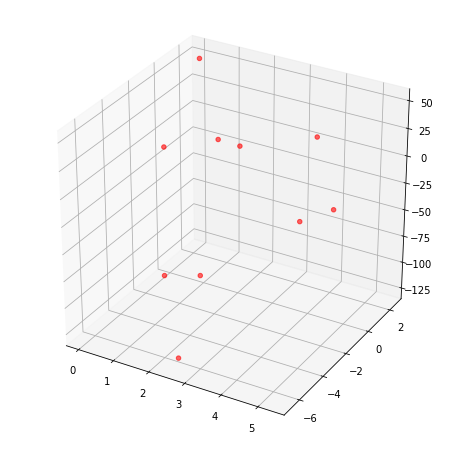

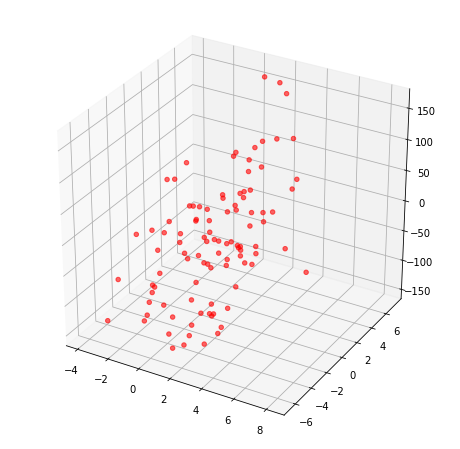

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
c0 = -4
c1 = 9
c2 = 22
m = 10
x1 = 2*np.random.randn(m) + 2
x2 = 3*np.random.randn(m) - 1
y = c0 + c1*x1 + c2*x2 + 1.5*np.random.randn(m)
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
# Matriz de datos
D1 = np.zeros( (m,3))
D1[:,0] = x1
D1[:,1] = x2
D1[:,2] = y
c0 = -4
c1 = 9
c2 = 22
m = 100
x1 = 2*np.random.randn(m) + 2
x2 = 3*np.random.randn(m) - 1
y = c0 + c1*x1 + c2*x2 + 1.5*np.random.randn(m)
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y, marker='o', c="red", alpha=0.6)
D2 = np.zeros( (m,3))
D2[:,0] = x1
D2[:,1] = x2
D2[:,2] = y

In [ ]:
import numpy as np
def Matr(A):
  yi= np.zeros(len(A))
  s= (len(A), len(A[0]))
  A1= np.zeros(s)
  for i in range(len(A)):
    yi[i]= A[i][len(A[0])-1]
    for j in range(len(A[0])-1):
      A1[i][j+1]= A[i][j] 
    A1[i][0]= 1
  return A1,yi
A= np.array([[2,3,4],[1,4,2],[8,3,2], [9,3,2]])
Matr(A)

(array([[1., 2., 3.],
        [1., 1., 4.],
        [1., 8., 3.],
        [1., 9., 3.]]), array([4., 2., 2., 2.]))

In [ ]:
def forwSubs(Matr, lenMatr, Arrb, tao):
  x= np.zeros(lenMatr)
  if len(Matr[1])!= len(Arrb):
    print("No es un sistema compatible.")
  else:
    x[0]= Arrb[0]/Matr[0][0]
    for i in range(1,lenMatr):
      b=0
      for j in range(i):
        b = b + Matr[i][j]* x[j]
      b= Arrb[i]- b
      x[i]= b/Matr[i][i]
    return x


  
def BackSubs(Matr, lenMatr, Arrb, tao):
  x= np.zeros(lenMatr)
  if len(Matr[1])!= len(Arrb):
    print("No es un sistema compatible.")
  else:
    x[lenMatr-1]= Arrb[len(Arrb)-1]/ Matr[lenMatr-1][lenMatr-1]
    for i in range(lenMatr-2, -1, -1):
      b=0
      for j in range( len(Arrb)-1, i,-1):
        b = b + Matr[i][j]* x[j]
      b= Arrb[i]- b
      x[i]= b/Matr[i][i]
    return x
def CalcularSol(L, U, b, n,tao):
  b_hat= b.copy()
  for i in range(n):
    b_hat[i] = b[i]
  y_1= forwSubs(L, n, b_hat, tao)
  x_1= BackSubs(U, n, y_1, tao)
  return x_1

In [ ]:
def sum(A,i,j):
  c= 0 
  for k in range(j):
    c+=A[i][k]*A[j][k]
  return c
def Fact_Chole(A, n, tao):
  L = np.zeros((n,n))
  for j in range(n):
    L[j][j]= np.sqrt(A[j][j]- sum(L,j,j))
    for i in range(j+1,n):
      L[i][j]= (A[i][j]-sum(L,i,j))/L[j][j]
  return L, L.transpose()
tao= np.sqrt(np.finfo(float).eps)
A1, y1 = Matr(D1)
B= np.matmul(A1.transpose(),A1)
print(B)
A, A_T=Fact_Chole(B, 3, tao)
y1= np.matmul(A1.transpose(),y1)
print(y1)
p = np.arange(3)
CalcularSol(A, A_T, y1, 3, tao)

[[ 10.          24.09542028 -17.93791921]
 [ 24.09542028  87.36595115 -55.94885698]
 [-17.93791921 -55.94885698  94.2656298 ]]
[-219.84789945 -550.43088134 1632.27985349]


array([-4.04337227,  8.72881948, 21.72708807])

Tercera Parte 

[-0.00194907  0.04405505 -0.21565165 -0.02535874  1.0632688  -0.06223776]


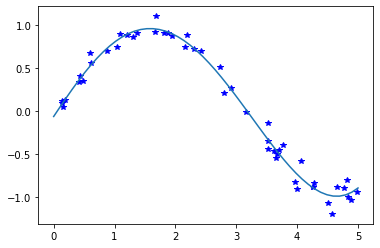

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def som(x):
  return 5+3*x+5*x**2+6*x**3+2*x**4
m = 50
x = 5*np.random.rand(m)
y = np.sin(x) + 0.1*np.random.randn(m)
plt.plot(x, y, 'b*')
D3 = np.zeros((m,2))
D3[:,0] = x
D3[:,1] = y
def Aju_Pol(A,m,n):
  y= np.zeros(m)
  A1= np.zeros((m,n+1))
  for i in range(m):
    y[i] = A[i][1]
    for j in range(n+1):
      A1[i][j]= (A[i][0])**(n-j)
  return A1, y
C, y2= Aju_Pol(D3,50, 5)
C1= np.matmul(C.transpose(),C)
A, A_T=Fact_Chole(C1, 6, tao)
y2= np.matmul(C.transpose(),y2)
p = np.arange(6)
rr= CalcularSol(A, A_T, y2, 6, tao)
print(rr)
def fun(rr,x):
  return rr[0]*x**5+rr[1]*x**4+rr[2]*x**3+rr[3]*x**2+rr[4]*x+rr[5]
x6= np.linspace(0,5, 50)
plt.plot(x6,fun(rr,x6))